In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 12})

AttributeError: module 'matplotlib.scale' has no attribute 'AsinhScale'

-----
### Farmakologijaaaa
-----

In [ ]:
df = pd.read_csv('data/farmakoloski.dat', sep='\t')
print(df.to_latex())

x = df['x[doza]']
y = df['y[odziv]']
y_err = df['dy[odziv]']

\begin{tabular}{lrrr}
\toprule
{} &  x[doza] &  y[odziv] &  dy[odziv] \\
\midrule
0 &        1 &    0.0001 &          3 \\
1 &        2 &    0.0010 &          3 \\
2 &        7 &   15.3000 &          3 \\
3 &       10 &   34.6000 &          3 \\
4 &       20 &   49.3000 &          3 \\
5 &       70 &   82.6000 &          3 \\
6 &      200 &   96.0000 &          3 \\
7 &     1000 &  100.0000 &          3 \\
\bottomrule
\end{tabular}



C:\Users\Tadej\AppData\Local\Temp\ipykernel_9236\3906100643.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


In [ ]:
# Linearizacija
X = 1./x
Y = 1./y
Y_err = y_err/y**2

dataframe = pd.DataFrame({
    'X' : X,
    'Y' : Y,
    'sigma_Yi' : Y_err
})

print(dataframe.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &         X &             Y &      sigma\_Yi \\
\midrule
0 &  1.000000 &  10000.000000 &  3.000000e+08 \\
1 &  0.500000 &   1000.000000 &  3.000000e+06 \\
2 &  0.142857 &      0.065359 &  1.281558e-02 \\
3 &  0.100000 &      0.028902 &  2.505931e-03 \\
4 &  0.050000 &      0.020284 &  1.234319e-03 \\
5 &  0.014286 &      0.012107 &  4.397048e-04 \\
6 &  0.005000 &      0.010417 &  3.255208e-04 \\
7 &  0.001000 &      0.010000 &  3.000000e-04 \\
\bottomrule
\end{tabular}



C:\Users\Tadej\AppData\Local\Temp\ipykernel_9236\2045859509.py:12: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dataframe.to_latex())


In [ ]:
def func1(x, y0, a):
    return (y0 * x) / (x + a)

def func2(x, y0, a, p):
    return (y0 * x**p) / (x**p + a**p)

def linear(x, a1, a2):
    return a1 * x + a2

Text(0.005, 1400, '$a_1=$0.202$\\pm$0.017\n$a_2=$(9.553$\\pm$0.227)e-03')

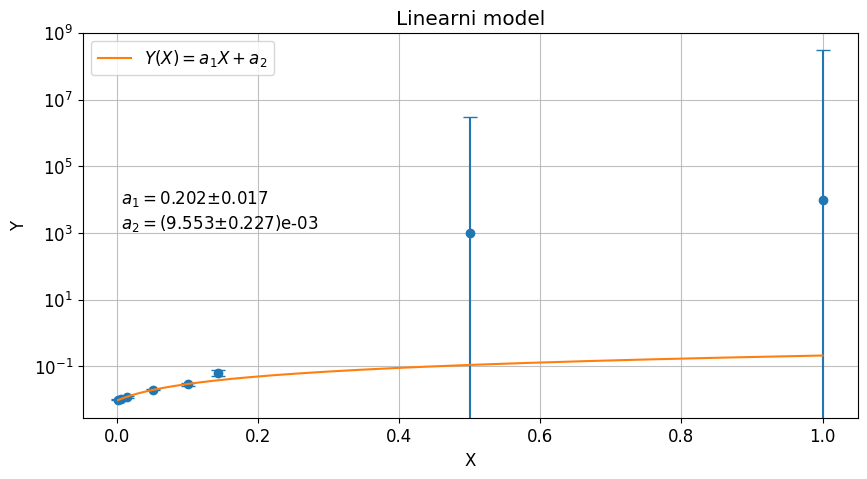

In [ ]:
popt, pcov, infodict, mesg, ier  = curve_fit(linear, X, Y, method='lm', absolute_sigma=True, sigma=Y_err, full_output=True)

a1_opt = popt[0]
a1_err = np.sqrt(pcov[0][0])
a2_opt = popt[1]
a2_err = np.sqrt(pcov[1][1])

X_opt = np.linspace(min(X), max(X), 1000)
Y_opt = linear(X_opt, a1_opt, a2_opt)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.grid(alpha=0.8)
ax.set_yscale('log')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Linearni model')
ax.errorbar(X, Y, yerr=Y_err, fmt='o', capsize=5, barsabove=True)
ax.plot(X_opt, Y_opt, label=r'$Y(X) = a_1 X + a_2$')
ax.legend()
ax.text(0.005, 1400, r'$a_1=$' + f'{round(a1_opt, 3):.3f}' + r'$\pm$' + f'{round(a1_err, 3):.3f}\n' + r'$a_2=$' + f'({round(1000*a2_opt, 3):.3f}' + r'$\pm$' + f'{round(1000*a2_err, 3):.3f})' + r'e-03')

In [ ]:
chi2 = np.sum(((Y-linear(X, a1_opt, a2_opt))/Y_err)**2 / (len(Y)-2))
print(chi2)

1.0396182402246699


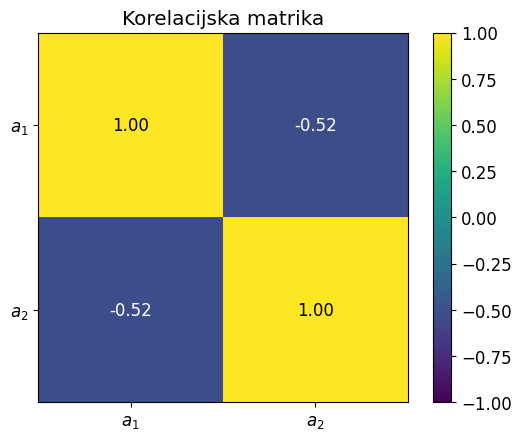

In [ ]:
# Calculate the standard deviations
std_devs = np.sqrt(np.diag(pcov))

# Create the correlation matrix
pcor = pcov / np.outer(std_devs, std_devs)

# Labels for x and y ticks
tick_labels = [r'$a_1$', r'$a_2$']

# Plotting the correlation matrix
plt.imshow(pcor, cmap='viridis', vmin=-1, vmax=1, interpolation='nearest')

# Adding x and y tick labels
plt.xticks(np.arange(len(tick_labels)), tick_labels)
plt.yticks(np.arange(len(tick_labels)), tick_labels)

# Adding annotations with values
for i in range(len(tick_labels)):
    for j in range(len(tick_labels)):
        if j == i:
            color = 'black'
        else:
            color='white'
        plt.text(j, i, f'{pcor[i, j]:.2f}', ha='center', va='center', color=color)

# Adding labels and title
plt.title('Korelacijska matrika')

# Adding colorbar
plt.colorbar()

# Show the plot
plt.show()

In [ ]:
y0_opt = 1./a2_opt
y0_err = a2_err/a2_opt * y0_opt
print('y0 = ' + f'{y0_opt}' + r'$\pm$' + f'{y0_err}')

a_opt = a1_opt / a2_opt
a_err = a_opt * np.sqrt((a2_err/a_opt)**2 + (a1_err/a1_opt)**2 - 2*pcor[0][1] * (a2_err*a1_err)/(a_opt*a1_opt))
print('a = ' + f'{a_opt}' + r'$\pm$' + f'{a_err}')

y0 = 104.68307337357858$\pm$2.4848024023055473
a = 21.189347945442766$\pm$1.791471884431099


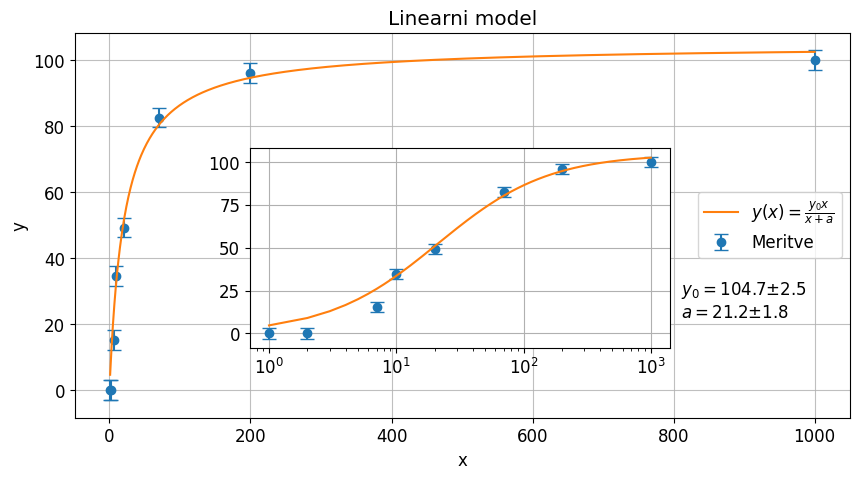

In [ ]:
x_opt = np.linspace(min(x), max(x), 1000)
y_opt = func1(x_opt, y0_opt, a_opt)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.grid(alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Linearni model')
ax.errorbar(x, y, yerr=y_err, fmt='o', capsize=5, barsabove=True, label='Meritve')
ax.plot(x_opt, y_opt, label=r'$y(x) = \frac{y_0 x}{x+a}$')
ax.legend(loc='right')
ax.text(810, 22, r'$y_0=$' + f'{round(y0_opt, 3):.1f}' + r'$\pm$' + f'{round(y0_err, 3):.1f}\n' + r'$a=$' + f'{round(a_opt, 3):.1f}' + r'$\pm$' + f'{round(a_err, 3):.1f}')

ax_inset = fig.add_axes([0.30, 0.25, 0.42, 0.40])  # Adjust the values as needed
ax_inset.grid()
ax_inset.set_xscale('log')
ax_inset.errorbar(x, y, yerr=y_err, fmt='o', capsize=5, barsabove=True, label='Meritve')
ax_inset.plot(x_opt, y_opt, label=r'$y(x) = \frac{y_0 x}{x+a}$')

### Nelinearni model

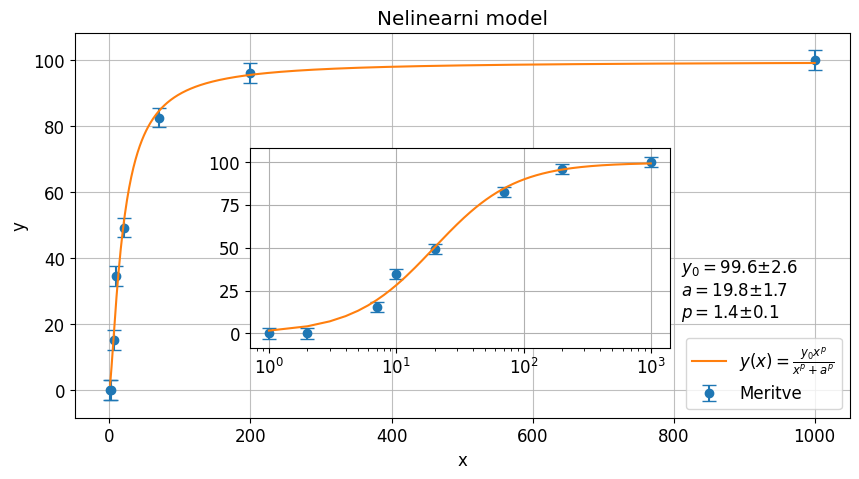

In [ ]:
popt, pcov, infodict, mesg, ier  = curve_fit(func2, x, y, method='lm', absolute_sigma=True, sigma=y_err, full_output=True)

y0_opt = popt[0]
y0_err = np.sqrt(pcov[0][0])
a_opt = popt[1]
a_err = np.sqrt(pcov[1][1])
p_opt = popt[2]
p_err = np.sqrt(pcov[2][2])

x_opt = np.linspace(min(x), max(x), 1000)
y_opt = func2(x_opt, y0_opt, a_opt, p_opt)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.grid(alpha=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Nelinearni model')
ax.errorbar(x, y, yerr=y_err, fmt='o', capsize=5, barsabove=True, label='Meritve')
ax.plot(x_opt, y_opt, label=r'$y(x) = \frac{y_0 x^p}{x^p+a^p}$')
ax.legend()
ax.text(810, 22, r'$y_0=$' + f'{round(y0_opt, 3):.1f}' + r'$\pm$' + f'{round(y0_err, 3):.1f}\n' + r'$a=$' + f'{round(a_opt, 3):.1f}' + r'$\pm$' + f'{round(a_err, 3):.1f}\n' + r'$p=$' + f'{round(p_opt, 3):.1f}' + r'$\pm$' + f'{round(p_err, 3):.1f}')

ax_inset = fig.add_axes([0.30, 0.25, 0.42, 0.40])  # Adjust the values as needed
ax_inset.grid()
ax_inset.set_xscale('log')
ax_inset.errorbar(x, y, yerr=y_err, fmt='o', capsize=5, barsabove=True, label='Meritve')
ax_inset.plot(x_opt, y_opt, label=r'$y(x) = \frac{y_0 x}{x+a}$')

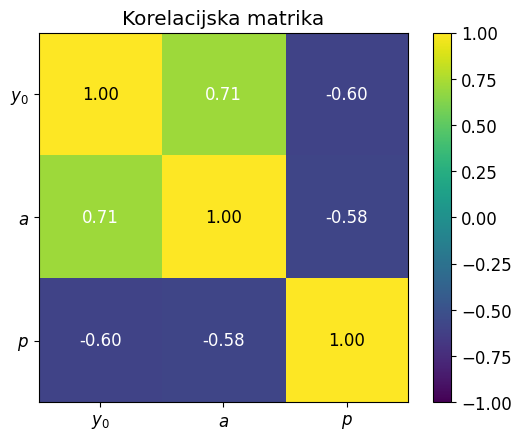

In [ ]:
# Calculate the standard deviations
std_devs = np.sqrt(np.diag(pcov))

# Create the correlation matrix
pcor = pcov / np.outer(std_devs, std_devs)

# Labels for x and y ticks
tick_labels = [r'$y_0$', r'$a$', r'$p$']

# Plotting the correlation matrix
plt.imshow(pcor, cmap='viridis', vmin=-1, vmax=1, interpolation='nearest')

# Adding x and y tick labels
plt.xticks(np.arange(len(tick_labels)), tick_labels)
plt.yticks(np.arange(len(tick_labels)), tick_labels)

# Adding annotations with values
for i in range(len(tick_labels)):
    for j in range(len(tick_labels)):
        if j == i:
            color = 'black'
        else:
            color='white'
        plt.text(j, i, f'{pcor[i, j]:.2f}', ha='center', va='center', color=color)

# Adding labels and title
plt.title('Korelacijska matrika')

# Adding colorbar
plt.colorbar()

# Show the plot
plt.show()

### Primerjava modelov

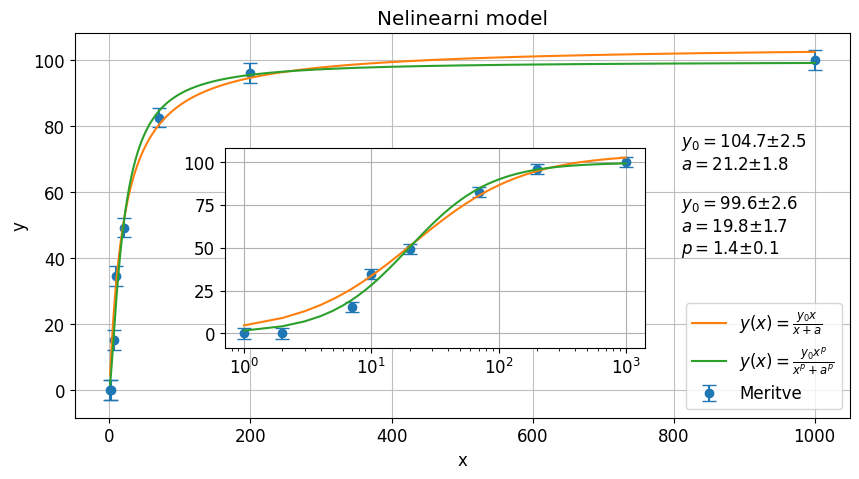

In [ ]:
popt, pcov, infodict, mesg, ier  = curve_fit(linear, X, Y, method='lm', absolute_sigma=True, sigma=Y_err, full_output=True)

a1_opt = popt[0]
a1_err = np.sqrt(pcov[0][0])
a2_opt = popt[1]
a2_err = np.sqrt(pcov[1][1])

y0_opt = 1./a2_opt
y0_err = a2_err/a2_opt * y0_opt

a_opt = a1_opt / a2_opt
a_err = a_opt * np.sqrt((a2_err/a_opt)**2 + (a1_err/a1_opt)**2 - 2*pcor[0][1] * (a2_err*a1_err)/(a_opt*a1_opt))

x_opt = np.linspace(min(x), max(x), 1000)
y_opt = func1(x_opt, y0_opt, a_opt)


popt_nelin, pcov_nelin, infodict, mesg, ier  = curve_fit(func2, x, y, method='lm', absolute_sigma=True, sigma=y_err, full_output=True)

y0_opt_nelin = popt_nelin[0]
y0_err_nelin = np.sqrt(pcov_nelin[0][0])
a_opt_nelin = popt_nelin[1]
a_err_nelin = np.sqrt(pcov_nelin[1][1])
p_opt_nelin = popt_nelin[2]
p_err_nelin = np.sqrt(pcov_nelin[2][2])

x_opt_nelin = np.linspace(min(x), max(x), 1000)
y_opt_nelin = func2(x_opt_nelin, y0_opt_nelin, a_opt_nelin, p_opt_nelin)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.grid(alpha=0.8)
# ax.set_xscale('log')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Nelinearni model')
ax.errorbar(x, y, yerr=y_err, fmt='o', capsize=5, barsabove=True, label='Meritve')
ax.plot(x_opt, y_opt, label=r'$y(x) = \frac{y_0 x}{x+a}$')
ax.plot(x_opt_nelin, y_opt_nelin, label=r'$y(x) = \frac{y_0 x^p}{x^p+a^p}$')
ax.text(810, 67, r'$y_0=$' + f'{round(y0_opt, 3):.1f}' + r'$\pm$' + f'{round(y0_err, 3):.1f}\n' + r'$a=$' + f'{round(a_opt, 3):.1f}' + r'$\pm$' + f'{round(a_err, 3):.1f}')
ax.text(810, 41.5, r'$y_0=$' + f'{round(y0_opt_nelin, 3):.1f}' + r'$\pm$' + f'{round(y0_err_nelin, 3):.1f}\n' + r'$a=$' + f'{round(a_opt_nelin, 3):.1f}' + r'$\pm$' + f'{round(a_err_nelin, 3):.1f}\n' + r'$p=$' + f'{round(p_opt_nelin, 3):.1f}' + r'$\pm$' + f'{round(p_err_nelin, 3):.1f}')
ax.legend()

ax_inset = fig.add_axes([0.275, 0.25, 0.42, 0.40])  # Adjust the values as needed
ax_inset.grid()
ax_inset.set_xscale('log')
ax_inset.errorbar(x, y, yerr=y_err, fmt='o', capsize=5, barsabove=True, label='Meritve')
ax_inset.plot(x_opt, y_opt, label=r'$y(x) = \frac{y_0 x}{x+a}$')
ax_inset.plot(x_opt_nelin, y_opt_nelin, label=r'$y(x) = \frac{y_0 x}{x+a}$')

In [ ]:
chi2_nelin = np.sum(((y-func2(x, y0_opt_nelin, a_opt_nelin, p_opt_nelin))/y_err)**2 / (len(y)-3))
chi2 = np.sum(((y-func1(x, y0_opt, a_opt))/y_err)**2 / (len(y)-2))
print(chi2_nelin)
print(chi2)

1.8713564816792934
4.3461200724636635
